In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [206]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [219]:
data.dropna(inplace=True) # look at the number of non null not consistent, inplace=True makes the changes to the original data, if not done the default is False and a new DataFrame is made

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [22]:
#shush = train_data.drop([19652], axis=0) #the axis refers to what axis the thing your are trying to drop belongs to, axis 1 = column, axis = 0 belongs to row

#train_data.head()


In [21]:
from sklearn.model_selection import train_test_split #train_test_split is used to divide data into training data and testing data

x = data.drop(["median_house_value"], axis=1) #used to remove the column from dataset, axis =1 refers to columns(the thing we are dropping belongs to columns)
y = data["median_house_value"] #column of median_house_value


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #determining what percentage is going to be used to test

train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1072,-121.83,39.74,34.0,3263.0,604.0,1290.0,594.0,2.5750,INLAND,130300.0
10420,-117.61,33.41,35.0,2556.0,404.0,946.0,399.0,6.1557,NEAR OCEAN,402900.0
9595,-120.44,37.31,16.0,3369.0,532.0,1770.0,574.0,5.2662,INLAND,126200.0
6968,-118.05,33.98,41.0,1406.0,428.0,1174.0,390.0,2.0147,<1H OCEAN,137500.0
18887,-122.24,38.11,52.0,2050.0,492.0,1277.0,463.0,3.0507,NEAR BAY,107300.0
...,...,...,...,...,...,...,...,...,...,...
18709,-122.40,40.58,43.0,1455.0,300.0,747.0,279.0,2.7857,INLAND,104200.0
14886,-117.08,32.63,28.0,2080.0,427.0,1266.0,434.0,2.2788,NEAR OCEAN,146300.0
18782,-122.33,40.48,26.0,695.0,126.0,319.0,124.0,3.2788,INLAND,101600.0
9440,-120.31,37.64,11.0,2403.0,497.0,890.0,344.0,3.0000,INLAND,120800.0


In [ ]:
#In the context of a typical machine learning workflow, x_train, x_test, y_train, and y_test are used for training and testing a model.

#x_train:
#x_train contains the features (independent variables) from the dataset that are used to train the machine learning model. This dataset is used to fit the model, allowing it to learn patterns and relationships within the data.
#x_test:
#x_test contains another set of features that the model hasn't seen during the training phase. These are used to evaluate the model's performance and test its ability to make predictions on new, unseen data.

#y_train:
#y_train contains the corresponding target values (dependent variable) that align with the x_train dataset. This target data is used during the training phase to teach the model how to predict the target variable based on the provided features.
#y_test:
#y_test contains the corresponding target values for the x_test dataset. During the testing phase, these target values are used to evaluate the model's predictions made on the test features (x_test). It's used to assess how well the model generalizes to new, unseen data.


In [222]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18344,-122.15,37.42,44.0,3558.0,839.0,1779.0,832.0,3.9243,NEAR BAY,404800.0
15037,-116.98,32.77,29.0,3558.0,447.0,1097.0,445.0,8.0930,<1H OCEAN,379600.0
17922,-121.98,37.35,36.0,1054.0,193.0,546.0,187.0,4.5625,<1H OCEAN,240000.0
8505,-118.30,33.88,29.0,850.0,229.0,563.0,204.0,3.7375,<1H OCEAN,247700.0
12105,-117.34,34.00,27.0,321.0,64.0,214.0,67.0,3.1750,INLAND,101600.0
...,...,...,...,...,...,...,...,...,...,...
11689,-117.99,33.87,16.0,1689.0,499.0,1260.0,453.0,3.1205,<1H OCEAN,174000.0
12188,-117.35,33.69,11.0,1229.0,236.0,581.0,190.0,3.1020,<1H OCEAN,111300.0
2631,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,NEAR OCEAN,79000.0
7793,-118.08,33.89,35.0,1071.0,290.0,1412.0,274.0,3.1917,<1H OCEAN,114900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

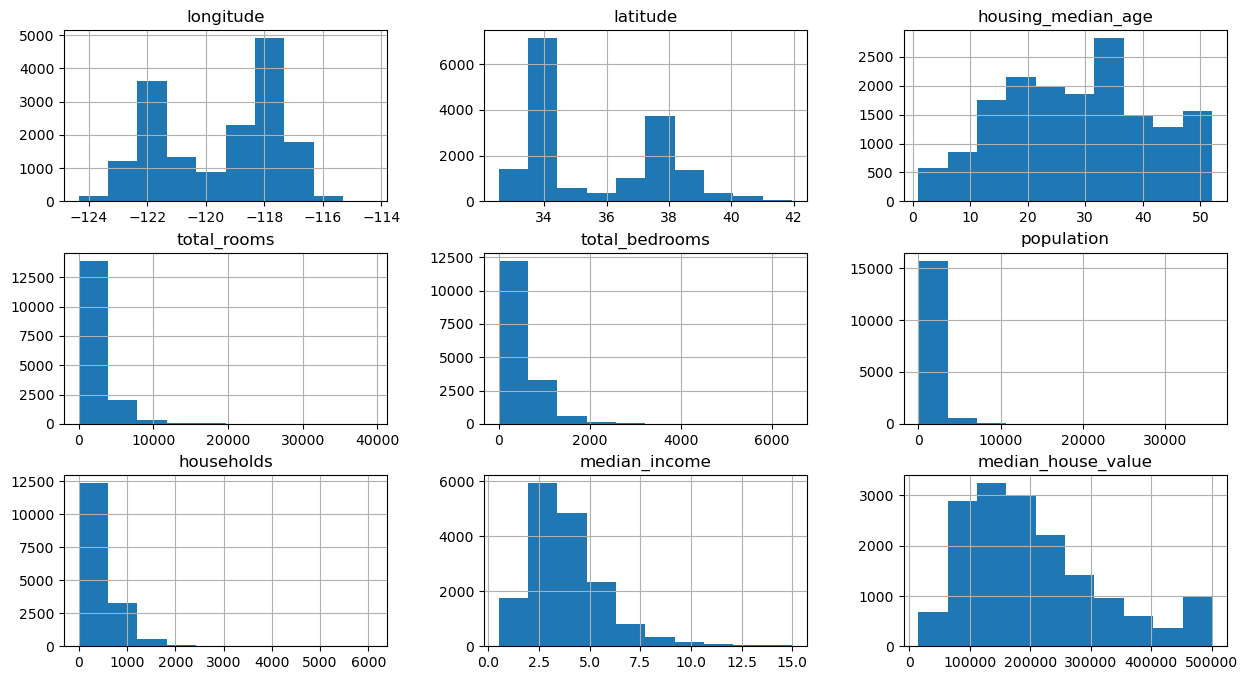

In [154]:
train_data.hist(figsize=(15, 8))

In [155]:
train_data.corr() #gives us a correlation matrix 

C:\Users\luqma\AppData\Local\Temp\ipykernel_21840\1274610549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr() #gives us a correlation matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924797,-0.117541,0.048426,0.071964,0.101862,0.058816,-0.016853,-0.043771
latitude,-0.924797,1.000000,0.022817,-0.040832,-0.069967,-0.111988,-0.074897,-0.078837,-0.145119
housing_median_age,-0.117541,0.022817,1.000000,-0.358797,-0.321524,-0.295496,-0.304076,-0.113330,0.099454
total_rooms,0.048426,-0.040832,-0.358797,1.000000,0.931642,0.855254,0.920264,0.193591,0.132547
total_bedrooms,0.071964,-0.069967,-0.321524,0.931642,1.000000,0.874740,0.980148,-0.010181,0.049297
population,0.101862,-0.111988,-0.295496,0.855254,0.874740,1.000000,0.903317,0.002768,-0.025463
households,0.058816,-0.074897,-0.304076,0.920264,0.980148,0.903317,1.000000,0.010423,0.064484
median_income,-0.016853,-0.078837,-0.113330,0.193591,-0.010181,0.002768,0.010423,1.000000,0.689135
median_house_value,-0.043771,-0.145119,0.099454,0.132547,0.049297,-0.025463,0.064484,0.689135,1.000000


C:\Users\luqma\AppData\Local\Temp\ipykernel_21840\3346828142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

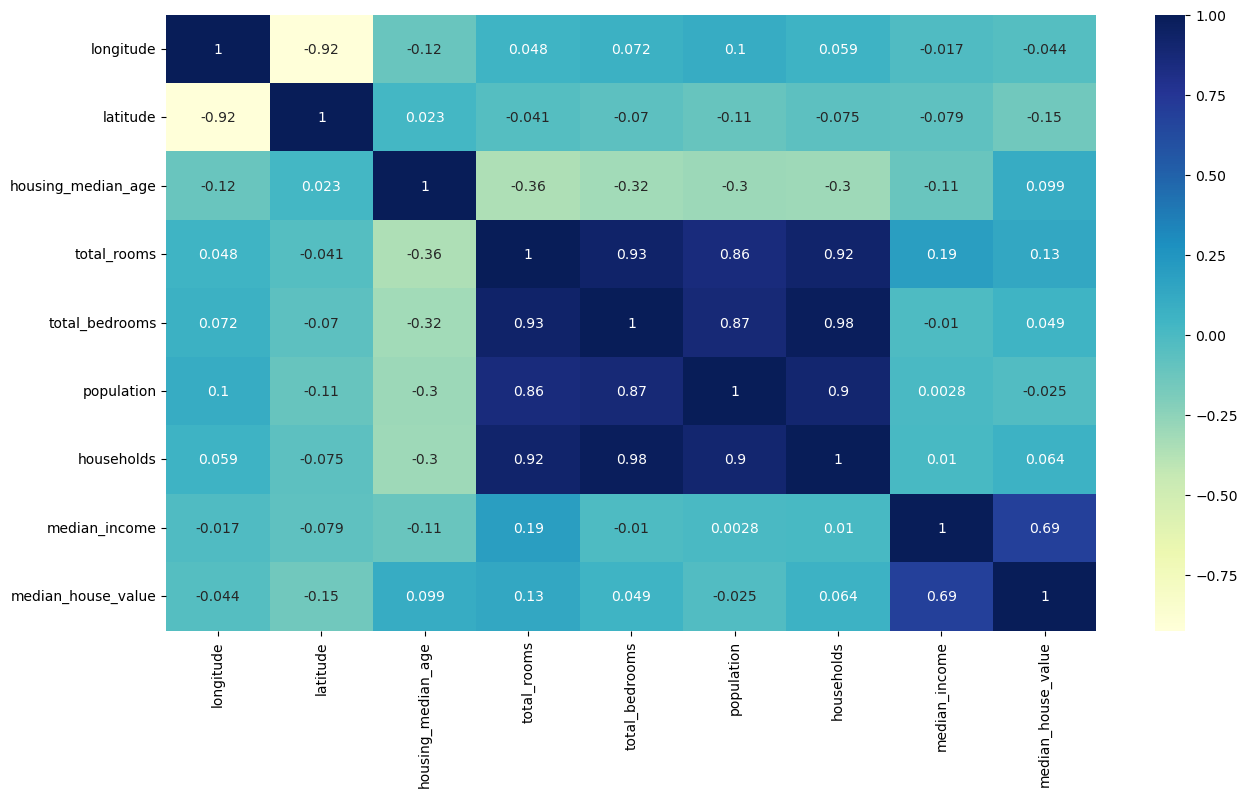

In [156]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [215]:
#plt.figure(figsize=(15, 8))
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2421,-119.45,36.58,18.0,7.262629,5.638355,6.625392,5.587249,3.7813,INLAND,87300.0
7301,-118.19,33.99,38.0,7.100852,5.609472,7.029973,5.575949,2.6673,<1H OCEAN,142300.0
3274,-122.91,39.05,20.0,7.029088,5.438079,6.432940,5.351858,3.2216,INLAND,93500.0
20293,-119.18,34.16,30.0,7.627544,5.910797,7.311218,5.971262,3.6546,NEAR OCEAN,186200.0
13920,-115.52,34.22,30.0,6.293419,4.919981,4.812184,4.158883,1.3333,INLAND,42500.0


In [212]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)
train_data["population"] = np.log(train_data["population"] + 1) # values for train_data has now changed

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

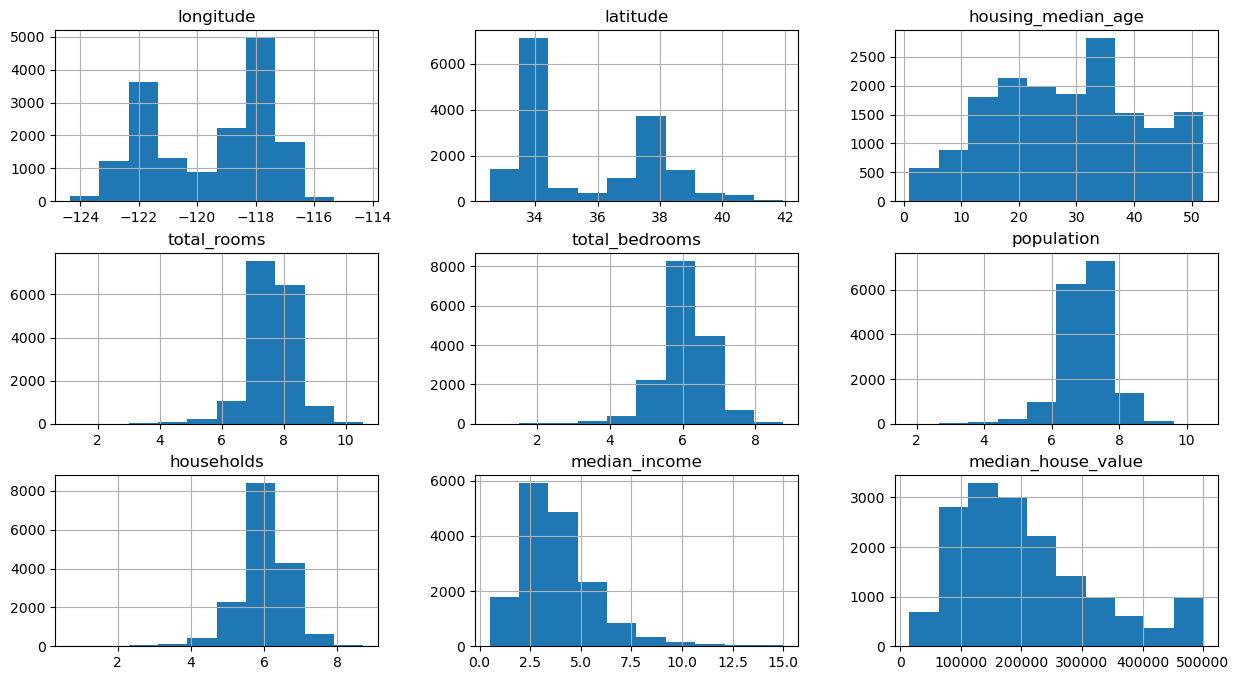

In [213]:
train_data.hist(figsize=(15, 8)) #use same command as before 
#plt.figure(figsize=(15, 8)) 
#sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [160]:
#train_data.ocean_proximity.value_counts()

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)#used to turn the categories into numbers in order to find correlation

In [161]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19652,-120.86,37.50,34.0,8.360071,6.904751,7.978311,6.870053,1.9829,82800.0,0,1,0,0,0
18784,-122.36,40.48,21.0,7.755339,6.244167,7.177019,6.234411,2.0899,74800.0,0,1,0,0,0
5601,-118.28,33.80,38.0,7.294377,5.799093,7.096721,5.817111,4.0000,165500.0,1,0,0,0,0
9509,-123.22,39.16,32.0,7.047517,5.236442,6.214608,5.342334,3.6587,154600.0,1,0,0,0,0
20469,-118.73,34.27,23.0,8.423102,6.637258,7.741534,6.613384,4.5560,205300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18290,-122.11,37.37,49.0,6.974479,5.252273,6.018593,5.147494,7.2045,500001.0,0,0,0,1,0
20327,-119.06,34.24,21.0,8.914223,6.892642,8.000685,6.896694,7.6775,391200.0,1,0,0,0,0
3412,-118.38,34.28,22.0,8.395929,6.716595,8.056110,6.729824,4.7932,166300.0,1,0,0,0,0
3565,-118.57,34.23,22.0,8.094378,6.475433,7.465655,6.373320,4.9676,221900.0,1,0,0,0,0


<Axes: >

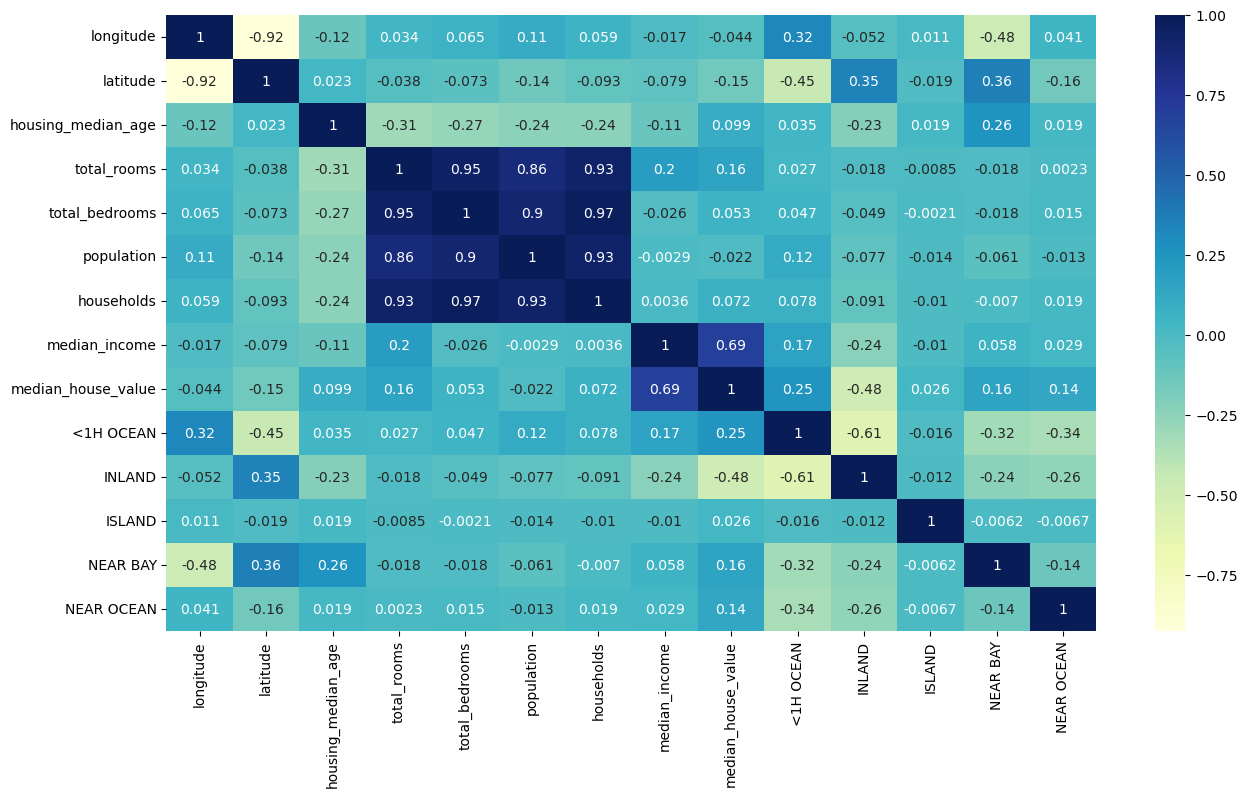

In [162]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

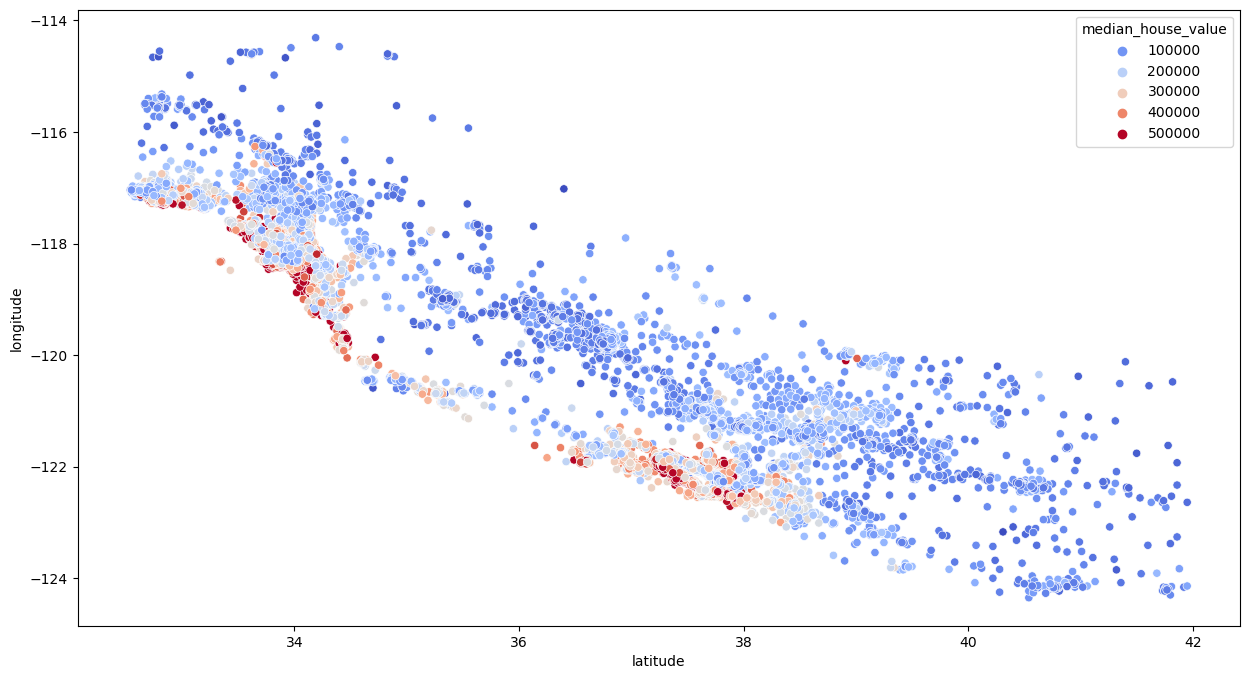

In [163]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude", y = "longitude", data=train_data, hue="median_house_value", palette = "coolwarm" )

In [164]:
train_data['"bedroom_ratio'] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

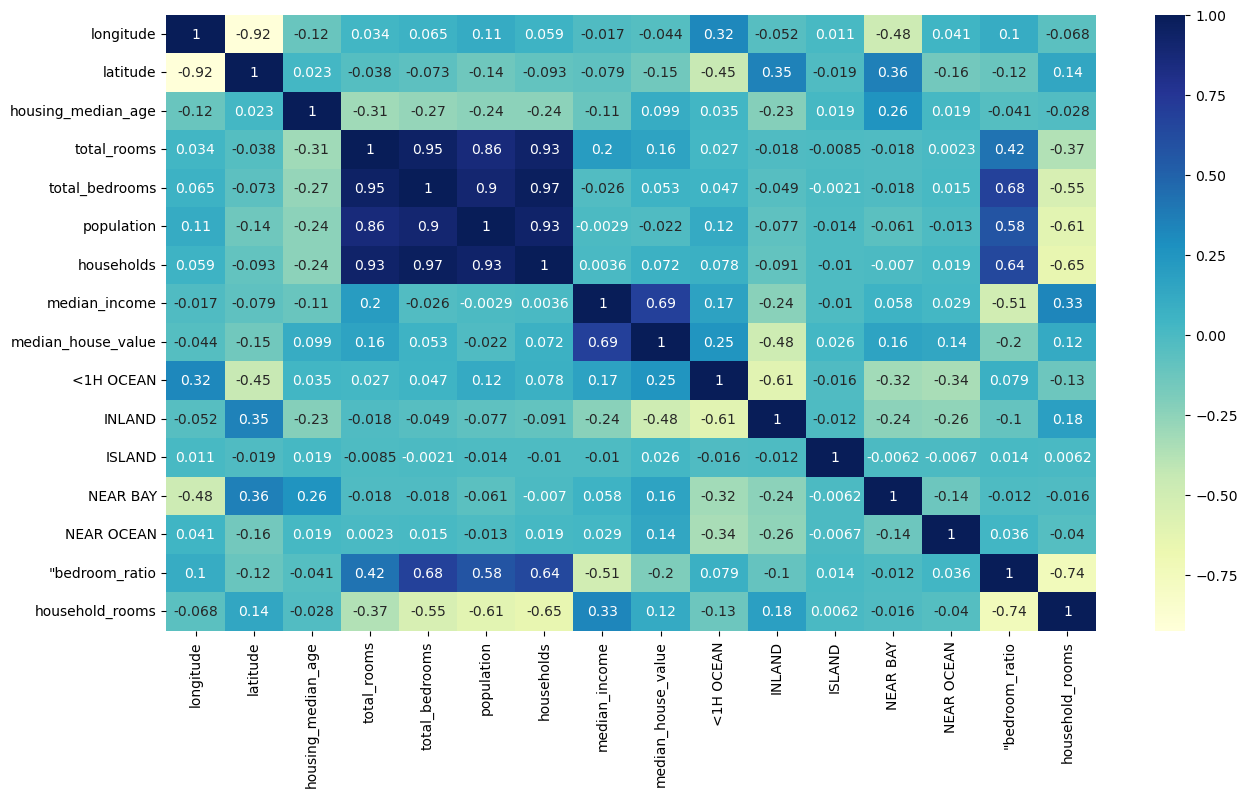

In [165]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [183]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(x_train, y_train)
  

LinearRegression()

In [184]:
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data['"bedroom_ratio'] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]



AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [185]:
#train_data
#test_data
x_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]
reg.score(x_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ISLAND
